In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct
import matplotlib.patches as patches
from copy import copy

In [2]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/mistflow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 14
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rc('axes', unicode_minus=False)

In [3]:
from scipy.stats import pearsonr

In [4]:
from scipy.ndimage import gaussian_filter

In [5]:
# Define function for temporal averaging
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end+1], axis = 0)
    return tmp_avg

In [6]:
Vx_600 = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[0].data
Vy_600 = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[1].data

In [7]:
Vx_300 = fits.open("pyFLCT_fwhm_300_dt_30_Inte_tracked.fits")[0].data
Vy_300 = fits.open("pyFLCT_fwhm_300_dt_30_Inte_tracked.fits")[1].data

In [8]:
# After that, we shall load velocities taken directly from simulation
Vx = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vx = Vx.transpose(0, 2, 1)
Vy = Vy.transpose(0, 2, 1)

In [9]:
np.shape(Vx)

(361, 1536, 1536)

In [10]:
# Our next task is to to average velocities using previously defined function
# We shall use the first half of total slices for that

# 360 = full
# 180 = 30 min
# 90 = 15 min
# 60 = 10 min
Vx_mean_sim60 = temporal_avg(Vx, 0, 60)
Vx_mean_sim60 = Vx_mean_sim60/1E5

Vy_mean_sim60 = temporal_avg(Vy, 0, 60)
Vy_mean_sim60 = Vy_mean_sim60/1E5

In [11]:
Vx_FLCT_600 = temporal_avg(Vx_600, 0, 60)
Vy_FLCT_600 = temporal_avg(Vy_600, 0, 60)

In [12]:
Vx_FLCT_300 = temporal_avg(Vx_300, 0, 60)
Vy_FLCT_300 = temporal_avg(Vy_300, 0, 60)

In [13]:
Vx_filtered22 = gaussian_filter(Vx_mean_sim60, 22.5, mode = "wrap")
Vy_filtered22 = gaussian_filter(Vy_mean_sim60, 22.5, mode = "wrap")

In [14]:
Vx_filtered11 = gaussian_filter(Vx_mean_sim60, 11.25, mode = "wrap")
Vy_filtered11 = gaussian_filter(Vy_mean_sim60, 11.25, mode = "wrap")

In [15]:
r_600_1 = pearsonr(Vx_600[0].flatten(), Vx[0].flatten())
print(r_600_1)

PearsonRResult(statistic=np.float64(0.5616806448613422), pvalue=np.float64(0.0))


In [16]:
r_600_2 = pearsonr(Vx_FLCT_600.flatten(), Vx_mean_sim60.flatten())
print(r_600_2)

PearsonRResult(statistic=np.float64(0.7915810596653666), pvalue=np.float64(0.0))


In [17]:
r_600_3 = pearsonr(Vx_FLCT_600.flatten(), Vx_filtered22.flatten())
print(r_600_3)

PearsonRResult(statistic=np.float64(0.9234203662843522), pvalue=np.float64(0.0))


In [18]:
r_600_y1 = pearsonr(Vy_600[0].flatten(), Vy[0].flatten())
print(r_600_y1)

PearsonRResult(statistic=np.float64(0.5505031119634196), pvalue=np.float64(0.0))


In [19]:
r_600_y2 = pearsonr(Vy_FLCT_600.flatten(), Vy_mean_sim60.flatten())
print(r_600_y2)

PearsonRResult(statistic=np.float64(0.7827179790741866), pvalue=np.float64(0.0))


In [20]:
r_600_y3 = pearsonr(Vy_FLCT_600.flatten(), Vy_filtered22.flatten())
print(r_600_y3)

PearsonRResult(statistic=np.float64(0.9168844129272529), pvalue=np.float64(0.0))


In [21]:
Vx_mean_sim30 = temporal_avg(Vx, 0, 30)
Vx_mean_sim30 = Vx_mean_sim30/1E5

Vy_mean_sim30 = temporal_avg(Vy, 0, 30)
Vy_mean_sim30 = Vy_mean_sim30/1E5

In [22]:
Vx_FLCT_600 = temporal_avg(Vx_600, 0, 30)
Vy_FLCT_600 = temporal_avg(Vy_600, 0, 30)

In [23]:
Vx_FLCT_300 = temporal_avg(Vx_300, 0, 30)
Vy_FLCT_300 = temporal_avg(Vy_300, 0, 30)

In [24]:
Vx_filtered22 = gaussian_filter(Vx_mean_sim30, 22.5, mode = "wrap")
Vy_filtered22 = gaussian_filter(Vy_mean_sim30, 22.5, mode = "wrap")

In [25]:
Vx_filtered11 = gaussian_filter(Vx_mean_sim30, 11.25, mode = "wrap")
Vy_filtered11 = gaussian_filter(Vy_mean_sim30, 11.25, mode = "wrap")

In [26]:
r_600_30_1 = pearsonr(Vx_600[0].flatten(), Vx[0].flatten())
print(r_600_30_1)

PearsonRResult(statistic=np.float64(0.5616806448613422), pvalue=np.float64(0.0))


In [27]:
r_600_30_2 = pearsonr(Vx_FLCT_600.flatten(), Vx_mean_sim30.flatten())
print(r_600_30_2)

PearsonRResult(statistic=np.float64(0.7450690826180195), pvalue=np.float64(0.0))


In [28]:
r_600_30_3 = pearsonr(Vx_FLCT_600.flatten(), Vx_filtered22.flatten())
print(r_600_30_3)

PearsonRResult(statistic=np.float64(0.897523410894962), pvalue=np.float64(0.0))


In [29]:
r_600_y30_1 = pearsonr(Vy_600[0].flatten(), Vy[0].flatten())
print(r_600_y30_1)

PearsonRResult(statistic=np.float64(0.5505031119634196), pvalue=np.float64(0.0))


In [30]:
r_600_y30_2 = pearsonr(Vy_FLCT_600.flatten(), Vy_mean_sim30.flatten())
print(r_600_y30_2)

PearsonRResult(statistic=np.float64(0.7279734420621307), pvalue=np.float64(0.0))


In [31]:
r_600_y30_3 = pearsonr(Vy_FLCT_600.flatten(), Vy_filtered22.flatten())
print(r_600_y30_3)

PearsonRResult(statistic=np.float64(0.8852904161425086), pvalue=np.float64(0.0))


In [32]:
r_300_30_1 = pearsonr(Vx_300[0].flatten(), Vx[0].flatten())
print(r_300_30_1)

PearsonRResult(statistic=np.float64(0.5134004470982599), pvalue=np.float64(0.0))


In [33]:
r_300_30_2 = pearsonr(Vx_FLCT_300.flatten(), Vx_mean_sim30.flatten())
print(r_300_30_2)

PearsonRResult(statistic=np.float64(0.7576622661036828), pvalue=np.float64(0.0))


In [34]:
r_300_30_3 = pearsonr(Vx_FLCT_300.flatten(), Vx_filtered22.flatten())
print(r_300_30_3)

PearsonRResult(statistic=np.float64(0.8572473479163005), pvalue=np.float64(0.0))


In [35]:
r_300_y30_1 = pearsonr(Vy_300[0].flatten(), Vy[0].flatten())
print(r_300_y30_1)

PearsonRResult(statistic=np.float64(0.5069102343954233), pvalue=np.float64(0.0))


In [36]:
r_300_y30_2 = pearsonr(Vy_FLCT_300.flatten(), Vy_mean_sim30.flatten())
print(r_300_y30_2)

PearsonRResult(statistic=np.float64(0.7376849756585381), pvalue=np.float64(0.0))


In [37]:
r_300_y30_3 = pearsonr(Vy_FLCT_300.flatten(), Vy_filtered22.flatten())
print(r_300_y30_3)

PearsonRResult(statistic=np.float64(0.8410567593570607), pvalue=np.float64(0.0))


In [38]:
Vx_mean_sim18 = temporal_avg(Vx, 0, 18)
Vx_mean_sim18 = Vx_mean_sim18/1E5

Vy_mean_sim18 = temporal_avg(Vy, 0, 18)
Vy_mean_sim18 = Vy_mean_sim18/1E5

In [39]:
Vx_FLCT_600 = temporal_avg(Vx_600, 0, 18)
Vy_FLCT_600 = temporal_avg(Vy_600, 0, 18)

In [40]:
Vx_FLCT_300 = temporal_avg(Vx_300, 0, 18)
Vy_FLCT_300 = temporal_avg(Vy_300, 0, 18)

In [41]:
Vx_filtered22 = gaussian_filter(Vx_mean_sim18, 22.5, mode = "wrap")
Vy_filtered22 = gaussian_filter(Vy_mean_sim18, 22.5, mode = "wrap")

In [42]:
Vx_filtered11 = gaussian_filter(Vx_mean_sim18, 11.25, mode = "wrap")
Vy_filtered11 = gaussian_filter(Vy_mean_sim18, 11.25, mode = "wrap")

In [43]:
r_600_18_1 = pearsonr(Vx_600[0].flatten(), Vx[0].flatten())
print(r_600_18_1)

PearsonRResult(statistic=np.float64(0.5616806448613422), pvalue=np.float64(0.0))


In [44]:
r_600_18_2 = pearsonr(Vx_FLCT_600.flatten(), Vx_mean_sim18.flatten())
print(r_600_18_2)

PearsonRResult(statistic=np.float64(0.7064908801257157), pvalue=np.float64(0.0))


In [45]:
r_600_18_3 = pearsonr(Vx_FLCT_600.flatten(), Vx_filtered22.flatten())
print(r_600_18_3)

PearsonRResult(statistic=np.float64(0.878356063766234), pvalue=np.float64(0.0))


In [46]:
r_600_y18_1 = pearsonr(Vy_600[0].flatten(), Vy[0].flatten())
print(r_600_y18_1)

PearsonRResult(statistic=np.float64(0.5505031119634196), pvalue=np.float64(0.0))


In [47]:
r_600_y18_2 = pearsonr(Vy_FLCT_600.flatten(), Vy_mean_sim18.flatten())
print(r_600_y18_2)

PearsonRResult(statistic=np.float64(0.691252441410855), pvalue=np.float64(0.0))


In [48]:
r_600_y18_3 = pearsonr(Vy_FLCT_600.flatten(), Vy_filtered22.flatten())
print(r_600_y18_3)

PearsonRResult(statistic=np.float64(0.8649143025368917), pvalue=np.float64(0.0))


In [49]:
r_300_18_1 = pearsonr(Vx_300[0].flatten(), Vx[0].flatten())
print(r_300_18_1)

PearsonRResult(statistic=np.float64(0.5134004470982599), pvalue=np.float64(0.0))


In [50]:
r_300_18_2 = pearsonr(Vx_FLCT_300.flatten(), Vx_mean_sim18.flatten())
print(r_300_18_2)

PearsonRResult(statistic=np.float64(0.7118272940826932), pvalue=np.float64(0.0))


In [51]:
r_300_18_3 = pearsonr(Vx_FLCT_300.flatten(), Vx_filtered22.flatten())
print(r_300_18_3)

PearsonRResult(statistic=np.float64(0.8232036797578435), pvalue=np.float64(0.0))


In [52]:
r_300_y18_1 = pearsonr(Vy_300[0].flatten(), Vy[0].flatten())
print(r_300_y18_1)

PearsonRResult(statistic=np.float64(0.5069102343954233), pvalue=np.float64(0.0))


In [53]:
r_300_y18_2 = pearsonr(Vy_FLCT_300.flatten(), Vy_mean_sim18.flatten())
print(r_300_y18_2)

PearsonRResult(statistic=np.float64(0.6949926151815398), pvalue=np.float64(0.0))


In [54]:
r_300_y18_3 = pearsonr(Vy_FLCT_300.flatten(), Vy_filtered22.flatten())
print(r_300_y18_3)

PearsonRResult(statistic=np.float64(0.8063184809959397), pvalue=np.float64(0.0))


In [55]:
# Form a table that contains values for all time values

<h2>Paper plots</h2>

In [56]:
Vx_mean_sim90 = temporal_avg(Vx, 0, 90)
Vx_mean_sim90 = Vx_mean_sim90/1E5

Vy_mean_sim90 = temporal_avg(Vy, 0, 90)
Vy_mean_sim90 = Vy_mean_sim90/1E5

In [57]:
Vx_FLCT_600 = temporal_avg(Vx_600, 0, 90)
Vy_FLCT_600 = temporal_avg(Vy_600, 0, 90)

In [58]:
Vx_FLCT_300 = temporal_avg(Vx_300, 0, 90)
Vy_FLCT_300 = temporal_avg(Vy_300, 0, 90)

In [59]:
Vx_filtered22 = gaussian_filter(Vx_mean_sim90, 22.5, mode = "wrap")
Vy_filtered22 = gaussian_filter(Vy_mean_sim90, 22.5, mode = "wrap")

In [60]:
Vx_filtered11 = gaussian_filter(Vx_mean_sim90, 11.25, mode = "wrap")
Vy_filtered11 = gaussian_filter(Vy_mean_sim90, 11.25, mode = "wrap")

In [61]:
from scipy.stats import linregress

/tmp/ipykernel_33841/2586531545.py:59: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_33841/2586531545.py:60: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("300_600_comp.png", dpi = 150, bbox_inches = 'tight')
/home/mistflow/anaconda3/envs/FLCT/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


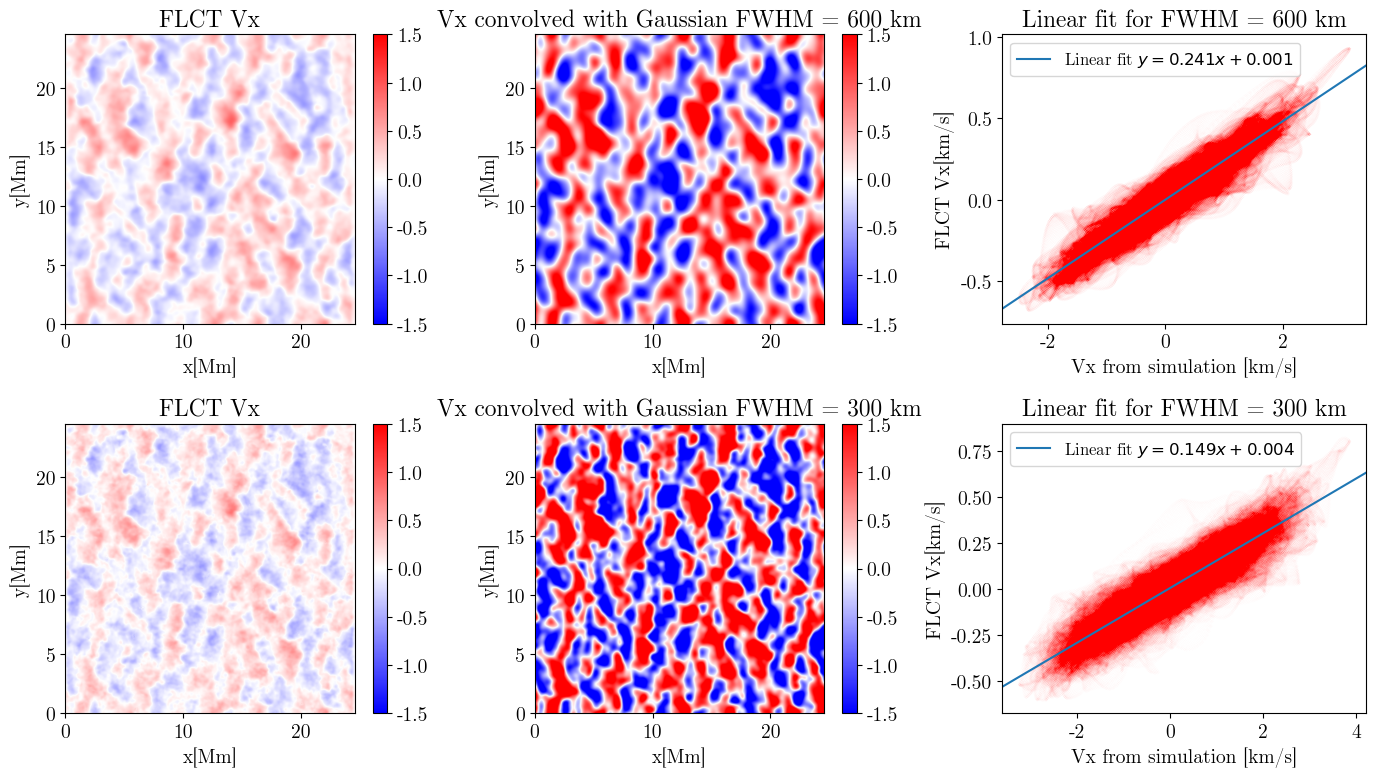

In [62]:
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
f = plt.figure(figsize = (14,8))
#plt.suptitle("Linear fit of FLCT Vx and convolved Vx from simulation for FHWM = {1200, 600, 300, 100}km")
# 4x3 plot, velicina A, velicina B, scatter A i B!!!
#ax1 = plt.subplot2grid((4,3), (0,0))
ax1 = f.add_subplot(231)
ax1.set_title("FLCT Vx")
ax1.set_xlabel("x[Mm]")
ax1.set_ylabel("y[Mm]")
im1 = ax1.imshow(Vx_FLCT_600[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im1)

#ax2 = plt.subplot2grid((4,3), (0,1))
ax2 = f.add_subplot(232)
ax2.set_title("Vx convolved with Gaussian FWHM = 600 km")
ax2.set_xlabel("x[Mm]")
ax2.set_ylabel("y[Mm]")
im2 = ax2.imshow(Vx_filtered22[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im2)

#ax3 = plt.subplot2grid((4,3), (0,2))
ax3 = f.add_subplot(233)
ax3.set_title("Linear fit for FWHM = 600 km")                                
ax3.set_ylabel("FLCT Vx[km/s]")
ax3.set_xlabel("Vx from simulation [km/s]")
ax3.scatter(Vx_filtered22.flatten(), Vx_FLCT_600.flatten(), s = 0.001, alpha = 0.05, color="red")
m1, b1, *_ = linregress(Vx_filtered22.flatten(), Vx_FLCT_600.flatten())
ax3.axline(xy1=(0, b1), slope=m1, label=f'Linear fit $y = {m1:.3f}x {b1:+.3f}$')
plt.legend(fontsize = 12)

#ax4 = plt.subplot2grid((4,3), (1,0))
ax4 = f.add_subplot(234)
ax4.set_title("FLCT Vx")
ax4.set_xlabel("x[Mm]")
ax4.set_ylabel("y[Mm]")
im4 = ax4.imshow(Vx_FLCT_300[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im4)

#ax5 = plt.subplot2grid((4,3), (1,1))
ax5 = f.add_subplot(235)
ax5.set_title("Vx convolved with Gaussian FWHM = 300 km")
ax5.set_xlabel("x[Mm]")
ax5.set_ylabel("y[Mm]")
im5 = ax5.imshow(Vx_filtered11[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im5)

#ax6 = plt.subplot2grid((4,3), (1,2))
ax6 = f.add_subplot(236)
ax6.set_title("Linear fit for FWHM = 300 km")                                
ax6.set_ylabel("FLCT Vx[km/s]")
ax6.set_xlabel("Vx from simulation [km/s]")
ax6.scatter(Vx_filtered11.flatten(), Vx_FLCT_300.flatten(), s = 0.001, alpha = 0.05, color="red")
m2, b2, *_ = linregress(Vx_filtered11.flatten(), Vx_FLCT_300.flatten())
ax6.axline(xy1=(0, b2), slope=m2, label=f'Linear fit $y = {m2:.3f}x {b2:+.3f}$')
plt.legend(fontsize = 12)



plt.tight_layout()
plt.savefig("300_600_comp.png", dpi = 150, bbox_inches = 'tight')

In [63]:
first = np.fromfile("tau_slice_1.000.000000", dtype = "float32")
first_ = first[4:].reshape(11, 1536, 1536)
Bz_1 = first_[7,:,:]
Bz_1 = Bz_1 * np.sqrt(4*np.pi)

In [64]:
V_z_sim = first_[1,:,:]
V_y_sim = first_[3,:,:]
V_x_sim = first_[2,:,:]
T = first_[8,:,:]

In [65]:
from matplotlib import cm
from matplotlib.colors import Normalize

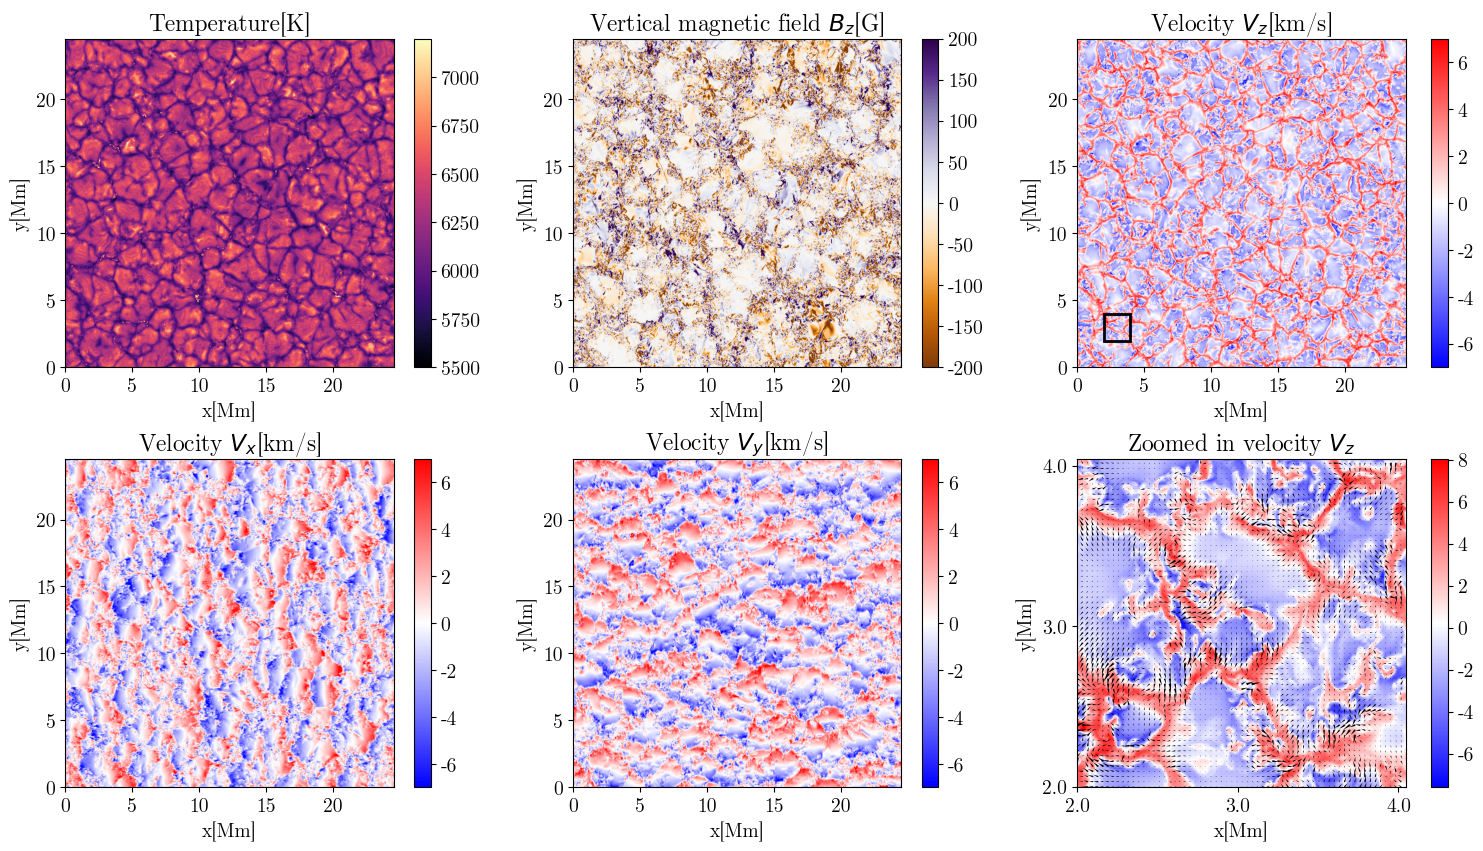

In [66]:
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
f = plt.figure(constrained_layout = True, figsize = (15,8.4))
#f = plt.figure(figsize = (14,8))
#plt.suptitle("Linear fit of FLCT Vx and convolved Vx from simulation for FHWM = {1200, 600, 300, 100}km")
# 4x3 plot, velicina A, velicina B, scatter A i B!!!
#ax1 = plt.subplot2grid((4,3), (0,0))
ax1 = f.add_subplot(231)
ax1.set_title("Temperature[K]")
ax1.set_xlabel("x[Mm]")
ax1.set_ylabel("y[Mm]")
im1 = ax1.imshow(T[:, :], origin='lower', cmap = "magma", extent = (0, 24.536, 0, 24.536), vmin = 5500, vmax = 7200)
plt.colorbar(im1)

#ax2 = plt.subplot2grid((4,3), (0,1))
ax2 = f.add_subplot(232)
ax2.set_title("Vertical magnetic field $B_z$[G]")
ax2.set_xlabel("x[Mm]")
ax2.set_ylabel("y[Mm]")
im2 = ax2.imshow(Bz_1[:, :], origin='lower', cmap = "PuOr", extent = (0, 24.536, 0, 24.536),vmin = -200, vmax = 200)
plt.colorbar(im2)

#ax3 = plt.subplot2grid((4,3), (0,2))
ax3 = f.add_subplot(233)
ax3.set_title("Velocity $V_z$[km/s]")                                
ax3.set_xlabel("x[Mm]")
ax3.set_ylabel("y[Mm]")
rect = patches.Rectangle((2, 2), 2, 2, linewidth=2, edgecolor='black', facecolor='none')
ax3.add_patch(rect)
im3 = ax3.imshow(-V_z_sim[:, :]/1E5, origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -7, vmax = 7)
plt.colorbar(im3)

#ax4 = plt.subplot2grid((4,3), (1,0))
ax4 = f.add_subplot(234)
ax4.set_title("Velocity $V_x$[km/s]")
ax4.set_xlabel("x[Mm]")
ax4.set_ylabel("y[Mm]")
im4 = ax4.imshow(V_x_sim[:, :]/1E5, origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -7, vmax = 7)
plt.colorbar(im4)

#ax5 = plt.subplot2grid((4,3), (1,1))
ax5 = f.add_subplot(235)
ax5.set_title("Velocity $V_y$[km/s]")
ax5.set_xlabel("x[Mm]")
ax5.set_ylabel("y[Mm]")
im5 = ax5.imshow(V_y_sim[:, :]/1E5, origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -7, vmax = 7)
plt.colorbar(im5)

#ax6 = plt.subplot2grid((4,3), (1,2))
ax6 = f.add_subplot(236)
ax6.set_title("Zoomed in velocity $V_z$")
ax6.set_xlabel("x[Mm]")
ax6.set_ylabel("y[Mm]")                             
xmin = 256
xmax = 512
ymin = 256
ymax=  512

Bgtx_disp = V_x_sim[ymin:ymax,xmin:xmax]/1E5
Bgty_disp = V_y_sim[ymin:ymax,xmin:xmax]/1E5
Bgtz_disp = V_z_sim[ymin:ymax,xmin:xmax]/1E5

ysize,xsize = np.shape(Bgtx_disp)

stride = 4


xmaxind = int(round(xsize/stride))
ymaxind = int(round(ysize/stride))

xstr, ystr = np.meshgrid(stride*np.arange(0,xmaxind),stride*np.arange(0,ymaxind))
im6 = ax6.imshow(-Bgtz_disp, origin='lower',cmap='bwr')
ax6.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride], headwidth = 4, headaxislength = 16, headlength = 14)
#ax6.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride])
plt.xticks([0,125,250], [2.0, 3.0,4.000])
plt.yticks([0,125,250], [2.0, 3.0,4.000])
#norm = Normalize(vmin=(-0.6)*1e6, vmax = 0.6*1e6)
#plt.colorbar(cm.ScalarMappable(norm=norm, cmap="bwr"), ax = ax6)
plt.colorbar(im6)



#plt.tight_layout()
plt.savefig("Simulation_para.png", dpi = 70, bbox_inches = 'tight')

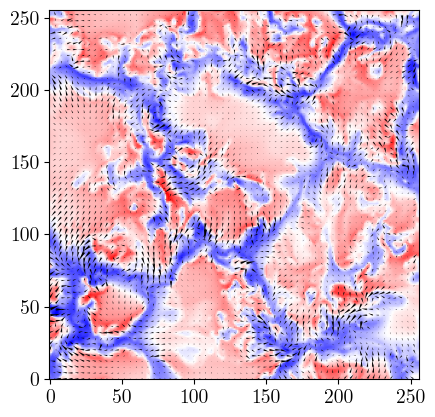

In [67]:
xmin = 256
xmax = 512
ymin = 256
ymax=  512

Bgtx_disp = V_x_sim[ymin:ymax,xmin:xmax]/1E5
Bgty_disp = V_y_sim[ymin:ymax,xmin:xmax]/1E5
Bgtz_disp = V_z_sim[ymin:ymax,xmin:xmax]/1E5

plt.imshow(Bgtz_disp, origin = "lower", cmap = "bwr")
plt.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride], headwidth = 4, headaxislength = 12, headlength = 14)

In [68]:
print(V_x_sim/1E5)

[[1.9820384 1.9392114 1.4349072 ... 2.4149725 2.2777548 2.19201  ]
 [2.1276762 1.9948179 1.851506  ... 2.3879929 2.3675025 2.3359892]
 [2.3292916 2.1158216 2.111543  ... 2.2668633 2.3766482 2.362528 ]
 ...
 [1.2814795 0.8281635 0.4775422 ... 2.2872279 2.0980136 1.6468141]
 [1.7232206 1.3365542 0.8931396 ... 2.2000778 2.1020577 1.7868352]
 [1.7848111 1.7380409 1.0780907 ... 2.2899635 2.0827088 1.9643098]]


In [69]:
print(Vx_filtered22)

[[0.9995838  0.96013904 0.91983896 ... 1.1112638  1.0752923  1.038018  ]
 [1.014392   0.9749845  0.9347041  ... 1.1258625  1.0899763  1.0527722 ]
 [1.0288554  0.9894832  0.9492204  ... 1.1401231  1.1043198  1.0671836 ]
 ...
 [0.95336294 0.91379154 0.87341744 ... 1.0657145  1.0294732  0.9919741 ]
 [0.96904075 0.9295142  0.88916755 ... 1.0811609  1.045012   1.0075904 ]
 [0.98445743 0.94497305 0.904651   ... 1.0963539  1.0602949  1.0229481 ]]


<h2>23. 11. 2024.</h2>

In [70]:
Vx_mean_sim90 = temporal_avg(Vx, 0, 90)
Vx_mean_sim90 = Vx_mean_sim90/1E5

Vy_mean_sim90 = temporal_avg(Vy, 0, 90)
Vy_mean_sim90 = Vy_mean_sim90/1E5

In [71]:
Vx_FLCT_600 = temporal_avg(Vx_600, 0, 90)
Vy_FLCT_600 = temporal_avg(Vy_600, 0, 90)

In [72]:
Vx_FLCT_300 = temporal_avg(Vx_300, 0, 90)
Vy_FLCT_300 = temporal_avg(Vy_300, 0, 90)

In [73]:
Vx_filtered22 = gaussian_filter(Vx_mean_sim90, 22.5, mode = "wrap")
Vy_filtered22 = gaussian_filter(Vy_mean_sim90, 22.5, mode = "wrap")

In [74]:
Vx_filtered11 = gaussian_filter(Vx_mean_sim90, 11.25, mode = "wrap")
Vy_filtered11 = gaussian_filter(Vy_mean_sim90, 11.25, mode = "wrap")

In [75]:
r_600_30_1 = pearsonr(Vx_600[0].flatten(), Vx[0].flatten())
print(r_600_30_1)

PearsonRResult(statistic=np.float64(0.5616806448613422), pvalue=np.float64(0.0))


In [76]:
r_600_30_2 = pearsonr(Vx_FLCT_600.flatten(), Vx_mean_sim90.flatten())
print(r_600_30_2)

PearsonRResult(statistic=np.float64(0.8173243422065642), pvalue=np.float64(0.0))


In [77]:
r_600_30_3 = pearsonr(Vx_FLCT_600.flatten(), Vx_filtered22.flatten())
print(r_600_30_3)

PearsonRResult(statistic=np.float64(0.9375096284141715), pvalue=np.float64(0.0))


In [78]:
r_600_y30_1 = pearsonr(Vy_600[0].flatten(), Vy[0].flatten())
print(r_600_y30_1)

PearsonRResult(statistic=np.float64(0.5505031119634196), pvalue=np.float64(0.0))


In [79]:
r_600_y30_2 = pearsonr(Vy_FLCT_600.flatten(), Vy_mean_sim90.flatten())
print(r_600_y30_2)

PearsonRResult(statistic=np.float64(0.8121617562084135), pvalue=np.float64(0.0))


In [80]:
r_600_y30_3 = pearsonr(Vy_FLCT_600.flatten(), Vy_filtered22.flatten())
print(r_600_y30_3)

PearsonRResult(statistic=np.float64(0.9325966781440204), pvalue=np.float64(0.0))


In [81]:
r_300_30_1 = pearsonr(Vx_300[0].flatten(), Vx[0].flatten())
print(r_300_30_1)

PearsonRResult(statistic=np.float64(0.5134004470982599), pvalue=np.float64(0.0))


In [82]:
r_300_30_2 = pearsonr(Vx_FLCT_300.flatten(), Vx_mean_sim90.flatten())
print(r_300_30_2)

PearsonRResult(statistic=np.float64(0.832532598494514), pvalue=np.float64(0.0))


In [83]:
r_300_30_3 = pearsonr(Vx_FLCT_300.flatten(), Vx_filtered22.flatten())
print(r_300_30_3)

PearsonRResult(statistic=np.float64(0.9157437254596412), pvalue=np.float64(0.0))


In [84]:
r_300_y30_1 = pearsonr(Vy_300[0].flatten(), Vy[0].flatten())
print(r_300_y30_1)

PearsonRResult(statistic=np.float64(0.5069102343954233), pvalue=np.float64(0.0))


In [85]:
r_300_y30_2 = pearsonr(Vy_FLCT_300.flatten(), Vy_mean_sim90.flatten())
print(r_300_y30_2)

PearsonRResult(statistic=np.float64(0.8303131334190189), pvalue=np.float64(0.0))


In [86]:
r_300_y30_3 = pearsonr(Vy_FLCT_300.flatten(), Vy_filtered22.flatten())
print(r_300_y30_3)

PearsonRResult(statistic=np.float64(0.912506245211913), pvalue=np.float64(0.0))


<h2>24. 01. 2025</h2>

In [87]:
def mean_v_from_file(file):
    v_x = fits.open(file)[0].data
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

def mean_vy_from_file(file):
    v_x = fits.open(file)[1].data
    v_x.shape
    v_x = v_x[0:90]
    v_x = np.mean(v_x, axis=0)
    small = np.where(v_x < -6.5)
    v_x[small] = -6.5
    big = np.where(v_x > 6.5)
    v_x[big] = 6.5
    return v_x

<h2>Cadence = 10 s, dt = 10 s, Intensity tracked</h2>

In [88]:
Vx_600I = fits.open("pyFLCT_vx_vy_fwhm_600_dt_10_Inte_tracked.fits")[0].data
Vy_600I = fits.open("pyFLCT_vx_vy_fwhm_600_dt_10_Inte_tracked.fits")[1].data

In [89]:
Vx_300I = fits.open("pyFLCT_vx_vy_fwhm_300_dt_10_Inte_tracked.fits")[0].data
Vy_300I = fits.open("pyFLCT_vx_vy_fwhm_300_dt_10_Inte_tracked.fits")[1].data

In [90]:
#Vx_600I_mean = temporal_avg(Vx_600I, 0, 90)
#Vy_600I_mean = temporal_avg(Vy_600I, 0, 90)
Vx_600I_mean = mean_v_from_file("pyFLCT_vx_vy_fwhm_600_dt_10_Inte_tracked.fits")
Vy_600I_mean = mean_vy_from_file("pyFLCT_vx_vy_fwhm_600_dt_10_Inte_tracked.fits")

In [91]:
#Vx_300I_mean = temporal_avg(Vx_300I, 0, 90)
#Vy_300I_mean = temporal_avg(Vy_300I, 0, 90)
Vx_300I_mean = mean_v_from_file("pyFLCT_vx_vy_fwhm_300_dt_10_Inte_tracked.fits")
Vy_300I_mean = mean_vy_from_file("pyFLCT_vx_vy_fwhm_300_dt_10_Inte_tracked.fits")

In [92]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LinearSegmentedColormap
#import mpl_scatter_density
from scipy.stats import gaussian_kde
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

import datashader.transfer_functions as tf
import datashader as ds
from datashader.mpl_ext import dsshow
import pandas as pd
import holoviews as hv
from holoviews.operation.datashader import dynspread
from holoviews.operation.datashader import datashade
import hvplot

In [93]:
#xy = np.vstack([Vx_filtered22.flatten(), Vx_600I_mean.flatten()])
#gk = gaussian_kde(xy)(xy)

In [94]:
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    plt.scatter( x, y, c=z, cmap = "viridis", **kwargs )
    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density')

    return ax




CPU times: user 5.07 s, sys: 1.09 s, total: 6.16 s
Wall time: 5.17 s


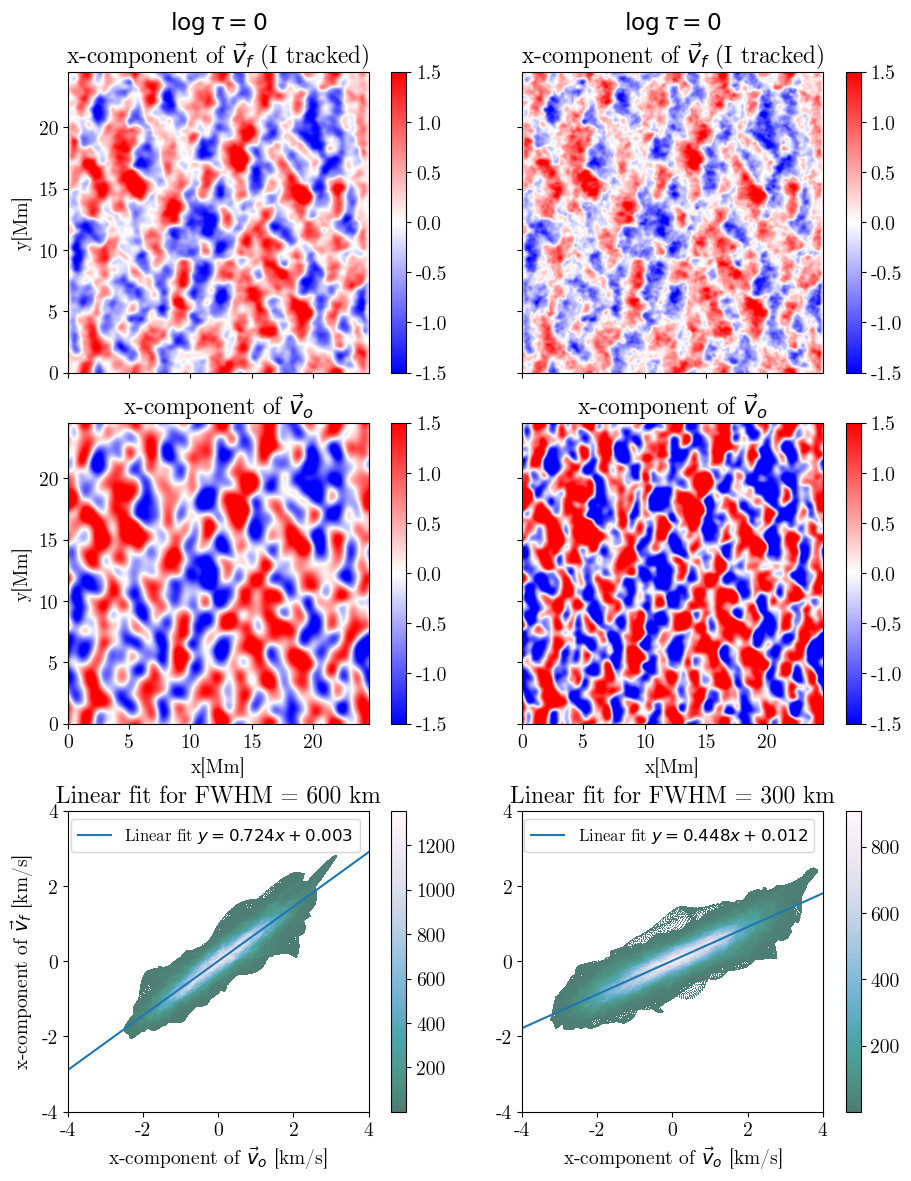

In [154]:
%%time
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
fig = plt.figure(constrained_layout=True, figsize = (9,11.7))
#plt.suptitle("Linear fit of FLCT Vx and convolved Vx from simulation for FHWM = {1200, 600, 300, 100}km")
# 4x3 plot, velicina A, velicina B, scatter A i B!!!
#ax1 = plt.subplot2grid((4,3), (0,0))
ax1 = fig.add_subplot(321)
ax1.set_title("$\log\\tau = 0$" + "\n" + "x-component of $\\vec{v}_f$ (I tracked)")
#ax1.set_xlabel("x[Mm]")
ax1.set_xticklabels([])
ax1.set_ylabel("y[Mm]")
im1 = ax1.imshow(Vx_600I_mean[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im1)

#ax2 = plt.subplot2grid((4,3), (0,1))
ax2 = fig.add_subplot(323)
ax2.set_title("x-component of $\\vec{v}_o$")
ax2.set_xlabel("x[Mm]")
ax2.set_ylabel("y[Mm]")
#ax2.set_xticklabels([])
#ax2.set_yticklabels([])
im2 = ax2.imshow(Vx_filtered22[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im2)

#ax3 = plt.subplot2grid((4,3), (0,2))
ax3 = fig.add_subplot(325)
ax3.set_title("Linear fit for FWHM = 600 km")                                
ax3.set_ylabel("x-component of $\\vec{v}_f$ [km/s]")
ax3.set_xlabel("x-component of $\\vec{v}_o$ [km/s]")

data , x_e, y_e = np.histogram2d( Vx_filtered22.flatten(), Vx_600I_mean.flatten(), bins = 30, density = True )
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([Vx_filtered22.flatten(),Vx_600I_mean.flatten()]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
#x, y, z = x[idx], y[idx], z[idx]

df = pd.DataFrame(dict(x = Vx_filtered22.flatten(), y = Vx_600I_mean.flatten()))
dsartist = dsshow(
        df,
        ds.Point("x", "y"),
        ds.count(),
        #vmin=np.min(z),
        #vmax=np.max(z),
        alpha = 0.7,
        norm="linear",
        aspect="equal",
        ax=ax3,
        cmap = "PuBuGn_r",
        x_range = (-4,4),
        y_range = (-4,4)
    )

#im3 = ax3.scatter(Vx_filtered22.flatten(), Vx_600I_mean.flatten(), c = 0.73*Vx_600I_mean.flatten(), s = 0.001, alpha = 0.05, cmap = "twilight")
m1I, b1I, *_ = linregress(Vx_filtered22.flatten(), Vx_600I_mean.flatten())
ax3.axline(xy1=(0, b1I), slope=m1I, label=f'Linear fit $y = {m1I:.3f}x {b1I:+.3f}$')
#norm = Normalize(vmin = np.min(z), vmax = np.max(z))
#cbar = plt.colorbar(im3, cm.ScalarMappable(norm = norm),)
#ax3.set_xlim([-4, 4])
#ax3.set_ylim([-4, 4])
plt.colorbar(dsartist)
plt.legend(fontsize = 12)

#ax4 = plt.subplot2grid((4,3), (1,0))
ax4 = fig.add_subplot(322)
ax4.set_title("$\log\\tau = 0$" + "\n" + "x-component of $\\vec{v}_f$ (I tracked)")
#ax4.set_xlabel("x[Mm]")
#ax4.set_ylabel("y[Mm]")
ax4.set_xticklabels([])
ax4.set_yticklabels([])
im4 = ax4.imshow(Vx_300I_mean[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im4)

#ax5 = plt.subplot2grid((4,3), (1,1))
ax5 = fig.add_subplot(324)
ax5.set_title("x-component of $\\vec{v}_o$")
ax5.set_xlabel("x[Mm]")
#ax5.set_ylabel("y[Mm]")
ax5.set_yticklabels([])
im5 = ax5.imshow(Vx_filtered11[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im5)

#ax6 = plt.subplot2grid((4,3), (1,2))
ax6 = fig.add_subplot(326)
ax6.set_title("Linear fit for FWHM = 300 km")                                
#ax6.set_ylabel("FLCT Vx[km/s]")
ax6.set_xlabel("x-component of $\\vec{v}_o$ [km/s]")


df1 = pd.DataFrame(dict(x = Vx_filtered11.flatten(), y = Vx_300I_mean.flatten()))
dsartist1 = dsshow(
        df1,
        ds.Point("x", "y"),
        ds.count(),
        #vmin=np.min(z),
        #vmax=np.max(z),
        alpha = 0.7,
        norm="linear",
        aspect="equal",
        ax=ax6,
        cmap = "PuBuGn_r"
        #cmap = "inferno"
    )

#im6 = ax6.scatter(Vx_filtered11.flatten(), Vx_300I_mean.flatten(), c = 0.45*Vx_filtered11.flatten(), s = 0.001, alpha = 0.3, cmap='PuBuGn')
m2I, b2I, *_ = linregress(Vx_filtered11.flatten(), Vx_300I_mean.flatten())
ax6.axline(xy1=(0, b2I), slope=m2I, label=f'Linear fit $y = {m2I:.3f}x {b2I:+.3f}$')
ax6.set_xlim([-4, 4])
ax6.set_ylim([-4, 4])
plt.colorbar(dsartist1)
plt.legend(fontsize = 12)

#cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
#cbar = fig.colorbar(im, cax=cbar_ax)
#cbar.set_label('$V_x$ [km/s]')


#plt.tight_layout()
plt.savefig("300_600Inte_comp.png", dpi = 100, bbox_inches = 'tight')


In [96]:
print(Vx_filtered22.flatten())

[0.9995838  0.96013904 0.91983896 ... 1.0963539  1.0602949  1.0229481 ]


In [97]:
print(np.min(Vx_filtered22.flatten()))
print(np.max(Vx_filtered22.flatten()))

-2.495771
3.1285064


<h3>Correlation</h3>

<h3>600 km</h3>

In [98]:
R_600xInte1 = pearsonr(Vx_600I[0].flatten(), Vx[0].flatten())
print(R_600xInte1)

PearsonRResult(statistic=np.float64(0.5616806448613422), pvalue=np.float64(0.0))


In [99]:
R_600yInte1 = pearsonr(Vy_600I[0].flatten(), Vy[0].flatten())
print(R_600yInte1)

PearsonRResult(statistic=np.float64(0.5505031119634197), pvalue=np.float64(0.0))


In [100]:
R_600xInte2 = pearsonr(Vx_600I_mean.flatten(), Vx_mean_sim90.flatten())
print(R_600xInte2)

PearsonRResult(statistic=np.float64(0.8174669154310051), pvalue=np.float64(0.0))


In [101]:
R_600yInte2 = pearsonr(Vy_600I_mean.flatten(), Vy_mean_sim90.flatten())
print(R_600yInte2)

PearsonRResult(statistic=np.float64(0.8124652230781947), pvalue=np.float64(0.0))


In [102]:
R_600xInte = pearsonr(Vx_600I_mean.flatten(), Vx_filtered22.flatten())
print(R_600xInte)

PearsonRResult(statistic=np.float64(0.9374428154657202), pvalue=np.float64(0.0))


In [103]:
R_600yInte = pearsonr(Vy_600I_mean.flatten(), Vy_filtered22.flatten())
print(R_600xInte)

PearsonRResult(statistic=np.float64(0.9374428154657202), pvalue=np.float64(0.0))


<h3>300 km</h3>

In [104]:
R_300xInte1 = pearsonr(Vx_300I[0].flatten(), Vx[0].flatten())
print(R_300xInte1)

PearsonRResult(statistic=np.float64(0.5134004470982598), pvalue=np.float64(0.0))


In [105]:
R_300yInte1 = pearsonr(Vy_300I[0].flatten(), Vy[0].flatten())
print(R_300yInte1)

PearsonRResult(statistic=np.float64(0.5069102343954233), pvalue=np.float64(0.0))


In [106]:
R_300xInte2 = pearsonr(Vx_300I_mean.flatten(), Vx_mean_sim90.flatten())
print(R_300xInte2)

PearsonRResult(statistic=np.float64(0.8327186764847766), pvalue=np.float64(0.0))


In [107]:
R_300yInte2 = pearsonr(Vy_300I_mean.flatten(), Vy_mean_sim90.flatten())
print(R_300yInte2)

PearsonRResult(statistic=np.float64(0.8306643274303978), pvalue=np.float64(0.0))


In [108]:
R_300xInte = pearsonr(Vx_300I_mean.flatten(), Vx_filtered11.flatten())
print(R_300xInte)

PearsonRResult(statistic=np.float64(0.8993547162103889), pvalue=np.float64(0.0))


In [109]:
R_300yInte = pearsonr(Vy_300I_mean.flatten(), Vy_filtered11.flatten())
print(R_300xInte)

PearsonRResult(statistic=np.float64(0.8993547162103889), pvalue=np.float64(0.0))


<h2>Cadence = 10 s, dt = 10 s, $B_z$ tracked</h2>

In [110]:
Vx_600B = fits.open("pyFLCT_vx_vy_fwhm_600_dt_10_Bz_tracked.fits")[0].data
Vy_600B = fits.open("pyFLCT_vx_vy_fwhm_600_dt_10_Bz_tracked.fits")[1].data

In [111]:
Vx_300B = fits.open("pyFLCT_vx_vy_fwhm_300_dt_10_Bz_tracked.fits")[0].data
Vy_300B = fits.open("pyFLCT_vx_vy_fwhm_300_dt_10_Bz_tracked.fits")[1].data

In [112]:
Vx_600B_mean = temporal_avg(Vx_600B, 0, 90)
Vy_600B_mean = temporal_avg(Vy_600B, 0, 90)
Vx_600B_cor = mean_v_from_file("pyFLCT_vx_vy_fwhm_600_dt_10_Bz_tracked.fits")
Vy_600B_cor = mean_vy_from_file("pyFLCT_vx_vy_fwhm_600_dt_10_Bz_tracked.fits")

In [113]:
Vx_300B_mean = temporal_avg(Vx_300B, 0, 90)
Vy_300B_mean = temporal_avg(Vy_300B, 0, 90)
Vx_300B_cor = mean_v_from_file("pyFLCT_vx_vy_fwhm_300_dt_10_Bz_tracked.fits")
Vy_300B_cor = mean_vy_from_file("pyFLCT_vx_vy_fwhm_300_dt_10_Bz_tracked.fits")

CPU times: user 4.86 s, sys: 386 ms, total: 5.24 s
Wall time: 4.25 s


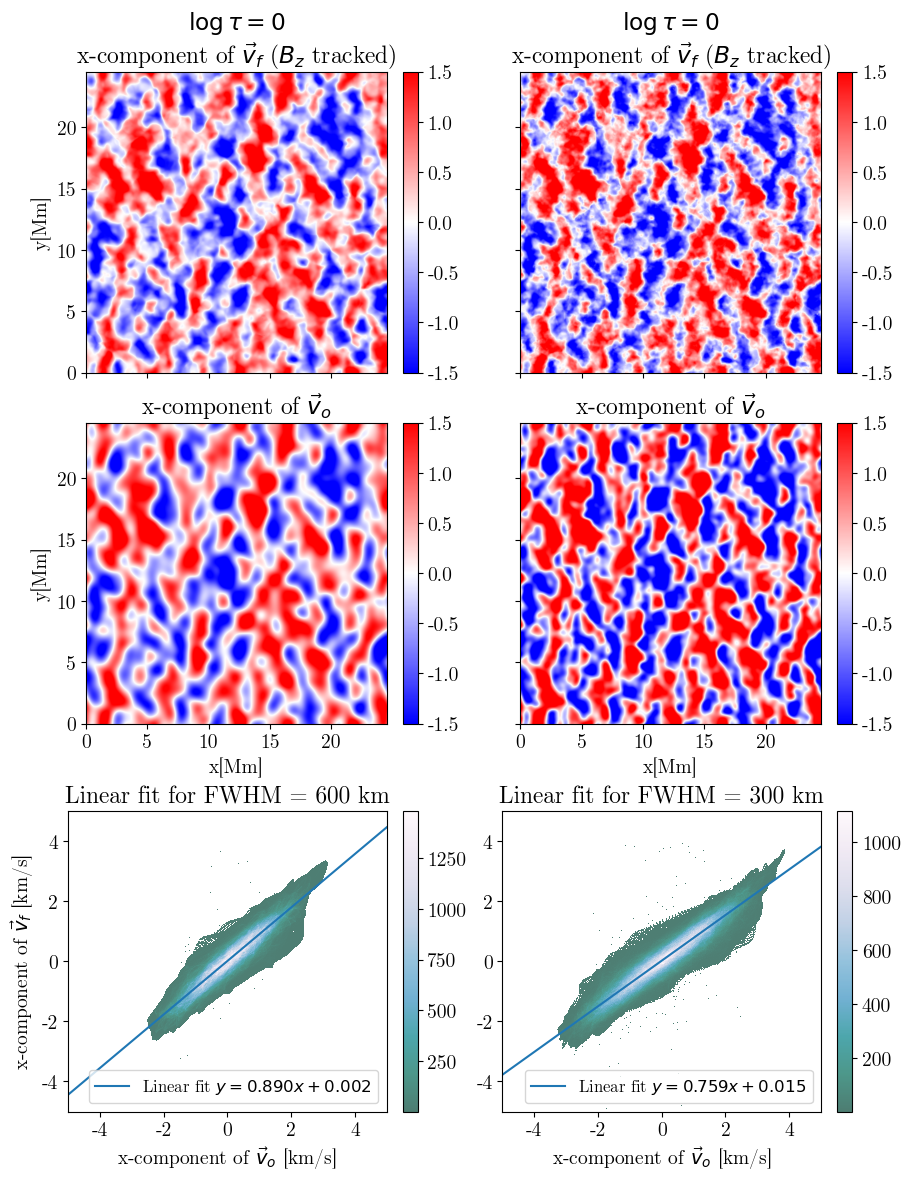

In [157]:
%%time
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
f = plt.figure(constrained_layout=True, figsize = (9,11.7))
#plt.suptitle("Linear fit of FLCT Vx and convolved Vx from simulation for FHWM = {1200, 600, 300, 100}km")
# 4x3 plot, velicina A, velicina B, scatter A i B!!!
#ax1 = plt.subplot2grid((4,3), (0,0))
ax1 = f.add_subplot(321)
ax1.set_title("$\log\\tau = 0$" + "\n" + "x-component of $\\vec{v}_f$ ($B_z$ tracked)")
#ax1.set_xlabel("x[Mm]")
ax1.set_xticklabels([])
ax1.set_ylabel("y[Mm]")
im1 = ax1.imshow(Vx_600B_cor[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im1)

#ax2 = plt.subplot2grid((4,3), (0,1))
ax2 = f.add_subplot(323)
ax2.set_title("x-component of $\\vec{v}_o$")
ax2.set_xlabel("x[Mm]")
ax2.set_ylabel("y[Mm]")
#ax2.set_xticklabels([])
#ax2.set_yticklabels([])
im2 = ax2.imshow(Vx_filtered22[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im2)

#ax3 = plt.subplot2grid((4,3), (0,2))
ax3 = f.add_subplot(325)
ax3.set_title("Linear fit for FWHM = 600 km")                                
ax3.set_ylabel("x-component of $\\vec{v}_f$ [km/s]")
ax3.set_xlabel("x-component of $\\vec{v}_o$ [km/s]")

df3 = pd.DataFrame(dict(x = Vx_filtered22.flatten(), y = Vx_600B_cor.flatten()))
dsartist3 = dsshow(
        df3,
        ds.Point("x", "y"),
        ds.count(),
        #vmin=np.min(z),
        #vmax=np.max(z),
        alpha = 0.7,
        norm="linear",
        aspect="auto",
        ax=ax3,
        cmap = "PuBuGn_r",
        #plot_width = 700,
        #plot_height = 700
    )

ax3.set_xlim([-5, 5])
ax3.set_ylim([-5, 5])
#ax3.scatter(Vx_filtered22.flatten(), Vx_600B_cor.flatten(), alpha = 0.05, color="red")
m1B, b1B, *_ = linregress(Vx_filtered22.flatten(), Vx_600B_cor.flatten())
ax3.axline(xy1=(0, b1B), slope=m1B, label=f'Linear fit $y = {m1B:.3f}x {b1B:+.3f}$')
plt.colorbar(dsartist3)
plt.legend(fontsize = 12, loc = "lower right")

#ax4 = plt.subplot2grid((4,3), (1,0))
ax4 = f.add_subplot(322)
ax4.set_title("$\log\\tau = 0$" + "\n" + "x-component of $\\vec{v}_f$ ($B_z$ tracked)")
#ax4.set_xlabel("x[Mm]")
#ax4.set_ylabel("y[Mm]")
ax4.set_xticklabels([])
ax4.set_yticklabels([])
im4 = ax4.imshow(Vx_300B_cor[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im4)

#ax5 = plt.subplot2grid((4,3), (1,1))
ax5 = f.add_subplot(324)
ax5.set_title("x-component of $\\vec{v}_o$")
ax5.set_xlabel("x[Mm]")
#ax5.set_ylabel("y[Mm]")
ax5.set_yticklabels([])
im5 = ax5.imshow(Vx_filtered11[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im5)

#ax6 = plt.subplot2grid((4,3), (1,2))
ax6 = f.add_subplot(326)
ax6.set_title("Linear fit for FWHM = 300 km")                                
#ax6.set_ylabel("FLCT Vx[km/s]")
ax6.set_xlabel("x-component of $\\vec{v}_o$ [km/s]")
ax6.set_xlim([-2, 2])
ax6.set_ylim([-8, 8])
#ax6.scatter(Vx_filtered11.flatten(), Vx_300B_cor.flatten(), s = 2, alpha = 0.05, color="red")

df4 = pd.DataFrame(dict(x = Vx_filtered11.flatten(), y = Vx_300B_cor.flatten()))

dsartist4 = dsshow(
        df4,
        ds.Point("x", "y"),
        ds.count(),
        #vmin=np.min(z),
        #vmax=np.max(z),
        alpha = 0.7,
        norm="linear",
        aspect="auto",
        ax=ax6,
        cmap = "PuBuGn_r",
        #plot_width = 700,
        #plot_height = 700,
        x_range = (-5,5),
        y_range = (-5,5)
    )



m2B, b2B, *_ = linregress(Vx_filtered11.flatten(), Vx_300B_cor.flatten())
ax6.axline(xy1=(0, b2B), slope=m2B, label=f'Linear fit $y = {m2B:.3f}x {b2B:+.3f}$')
plt.colorbar(dsartist4)
plt.legend(fontsize = 12, loc = "lower right")
'''
axins = inset_axes(ax4,
                    width="5%",  
                    height="200%",
                    loc='center right',
                    borderpad=-5
                   )

#cbar_ax = f.add_axes([0.975, 0.15, 0.02, 0.7])
cbar = f.colorbar(im1, cax = axins, location = "top")
cbar.set_label('$V_x$ [km/s]')
'''
#plt.tight_layout()
plt.savefig("300_600Bz_comp.png", dpi = 100, bbox_inches = 'tight')

<h3>Correlation</h3>

<h3>600 km</h3>

In [115]:
R_600xBz1 = pearsonr(Vx_600B[0].flatten(), Vx[0].flatten())
print(R_600xBz1)

PearsonRResult(statistic=np.float64(0.6082901259948335), pvalue=np.float64(0.0))


In [116]:
R_600yBz1 = pearsonr(Vy_600B[0].flatten(), Vy[0].flatten())
print(R_600yBz1)

PearsonRResult(statistic=np.float64(0.5838979716099791), pvalue=np.float64(0.0))


In [117]:
R_600xBz2 = pearsonr(Vx_600B_mean.flatten(), Vx_mean_sim90.flatten())
print(R_600xBz2)

PearsonRResult(statistic=np.float64(0.8265627718777794), pvalue=np.float64(0.0))


In [118]:
R_600yBz2 = pearsonr(Vy_600B_mean.flatten(), Vy_mean_sim90.flatten())
print(R_600yBz2)

PearsonRResult(statistic=np.float64(0.8292545115257934), pvalue=np.float64(0.0))


In [119]:
R_600xBz = pearsonr(Vx_600B_mean.flatten(), Vx_filtered22.flatten())
print(R_600xBz)

PearsonRResult(statistic=np.float64(0.9344542432952909), pvalue=np.float64(0.0))


In [120]:
R_600yBz = pearsonr(Vy_600B_mean.flatten(), Vy_filtered22.flatten())
print(R_600yBz)

PearsonRResult(statistic=np.float64(0.9340294483907491), pvalue=np.float64(0.0))


<h3 style="color:red">!!!Corrected!!!</h3>

In [121]:
R_600xBz2c = pearsonr(Vx_600B_cor.flatten(), Vx_mean_sim90.flatten())
print(R_600xBz2c)
R_600yBz2c = pearsonr(Vy_600B_cor.flatten(), Vy_mean_sim90.flatten())
print(R_600yBz2c)

PearsonRResult(statistic=np.float64(0.831049458780652), pvalue=np.float64(0.0))
PearsonRResult(statistic=np.float64(0.8310604263109082), pvalue=np.float64(0.0))


In [122]:
R_600xBzc = pearsonr(Vx_600B_cor.flatten(), Vx_filtered22.flatten())
print(R_600xBzc)
R_600yBzc = pearsonr(Vy_600B_cor.flatten(), Vy_filtered22.flatten())
print(R_600yBzc)

PearsonRResult(statistic=np.float64(0.9394378598951825), pvalue=np.float64(0.0))
PearsonRResult(statistic=np.float64(0.9356584550148547), pvalue=np.float64(0.0))


<h3>300 km</h3

In [123]:
R_300xBz1 = pearsonr(Vx_300B[0].flatten(), Vx[0].flatten())
print(R_300xBz1)

PearsonRResult(statistic=np.float64(0.6729079730485094), pvalue=np.float64(0.0))


In [124]:
R_300yBz1 = pearsonr(Vy_300B[0].flatten(), Vy[0].flatten())
print(R_300yBz1)

PearsonRResult(statistic=np.float64(0.6383922448733466), pvalue=np.float64(0.0))


In [125]:
R_300xBz2 = pearsonr(Vx_300B_mean.flatten(), Vx_mean_sim90.flatten())
print(R_300xBz2)

PearsonRResult(statistic=np.float64(0.3296859974451231), pvalue=np.float64(0.0))


In [126]:
R_300yBz2 = pearsonr(Vy_300B_mean.flatten(), Vy_mean_sim90.flatten())
print(R_300yBz2)

PearsonRResult(statistic=np.float64(0.5276901197174959), pvalue=np.float64(0.0))


In [127]:
R_300xBz = pearsonr(Vx_300B_mean.flatten(), Vx_filtered11.flatten())
print(R_300xBz)

PearsonRResult(statistic=np.float64(0.3469200279192363), pvalue=np.float64(0.0))


In [128]:
R_300yBz = pearsonr(Vy_300B_mean.flatten(), Vy_filtered11.flatten())
print(R_300yBz)

PearsonRResult(statistic=np.float64(0.5558827137462382), pvalue=np.float64(0.0))


<h3 style="color:red">!!!Corrected!!!</h3>

In [129]:
R_300xBz2c = pearsonr(Vx_300B_cor.flatten(), Vx_mean_sim90.flatten())
print(R_300xBz2c)
R_300yBz2c = pearsonr(Vy_300B_cor.flatten(), Vy_mean_sim90.flatten())
print(R_300yBz2c)

PearsonRResult(statistic=np.float64(0.9000459937338028), pvalue=np.float64(0.0))
PearsonRResult(statistic=np.float64(0.900272898509935), pvalue=np.float64(0.0))


In [130]:
R_300xBzc = pearsonr(Vx_300B_cor.flatten(), Vx_filtered22.flatten())
print(R_300xBzc)
R_300yBzc = pearsonr(Vy_300B_cor.flatten(), Vy_filtered22.flatten())
print(R_300yBzc)

PearsonRResult(statistic=np.float64(0.9307589070324968), pvalue=np.float64(0.0))
PearsonRResult(statistic=np.float64(0.9276943822748374), pvalue=np.float64(0.0))


<h1>New statistics</h1>

<h2>27. 03. 2025.</h2>

<h3>Inner product</h3>

In [131]:
# Define Cauchy-Schwartz inequality-based test C_{CS} in (Schrijver et al., 2006).
def cauchy_schwartz_inequality(X, Y):
    #x = np.random.randint(1, 100, 10)
    #y = np.random.randint(1, 100, 10)
    
    #inner_prod = np.inner(x, y)
    
    #inner_prod = lambda X, Y: sum(map(lambda x, y: x * y, X, Y))

    inner_prod = np.dot(np.array(X)[:], Y)
    
    #right = np.sqrt(np.sum(np.power(x, 2))) * np.sqrt(np.sum(np.power(y, 2)))
    
    return inner_prod

<h3>CS for Intensity tracking</h3>

In [132]:
CS_I600 = cauchy_schwartz_inequality(Vx_filtered22.flatten(), Vx_600I_mean.flatten())/len(Vx_filtered22.flatten())
print(CS_I600)

0.6432035570769601


In [133]:
CS_I300 = cauchy_schwartz_inequality(Vx_filtered11.flatten(), Vx_300I_mean.flatten())/len(Vx_filtered11.flatten())
print(CS_I300)

0.6831337468071327


<h3>CS for $B_z$ tracking</h3>

In [134]:
CS_B600 = cauchy_schwartz_inequality(Vx_filtered22.flatten(), Vx_600B_cor.flatten())/len(Vx_filtered22.flatten())
print(CS_B600)

0.7900515862443384


In [135]:
CS_B300 = cauchy_schwartz_inequality(Vx_filtered11.flatten(), Vx_300B_cor.flatten())/len(Vx_filtered11.flatten())
print(CS_B300)

1.1569546653748026


<h2>Angle</h2>

In [136]:
from numpy import dot
from numpy.linalg import norm
def CS_calc(a, b):
    s = 0
    for j in range(len(a)):
        cos_sim = dot(a[j], b[j])/(norm(a[j])*norm(b[j]))
        s = s + cos_sim
    return s/len(a)
    

In [137]:
csI600 = CS_calc(Vx_filtered22.flatten(), Vx_600I_mean.flatten())
print(csI600)

0.7992926703559028


In [138]:
csI300 = CS_calc(Vx_filtered11.flatten(), Vx_300I_mean.flatten())
print(csI300)

0.7480341593424479


In [139]:
csI600y = CS_calc(Vy_filtered22.flatten(), Vy_600I_mean.flatten())
print(csI600y)

0.7851028442382812


In [140]:
csI300y = CS_calc(Vy_filtered11.flatten(), Vy_300I_mean.flatten())
print(csI300y)

0.7473526000976562


In [141]:
csB600 = CS_calc(Vx_filtered22.flatten(), Vx_600B_cor.flatten())
print(csB600)

0.7974667019314237


In [142]:
csB600y = CS_calc(Vy_filtered22.flatten(), Vy_600B_cor.flatten())
print(csB600y)

0.7906621297200521


In [143]:
csB300 = CS_calc(Vx_filtered11.flatten(), Vx_300B_cor.flatten())
print(csB300)

0.8101925320095487


In [144]:
csB300y = CS_calc(Vy_filtered11.flatten(), Vy_300B_cor.flatten())
print(csB300y)

0.8143700493706597


<h2>Divergence and plotting</h2>

In [145]:
def divergence(f,h):
    """
    div(F) = dFx/dx + dFy/dy + ...
    g = np.gradient(Fx,dx, axis=1)+ np.gradient(Fy,dy, axis=0) #2D
    g = np.gradient(Fx,dx, axis=2)+ np.gradient(Fy,dy, axis=1) +np.gradient(Fz,dz,axis=0) #3D
    """
    num_dims = len(f)
    return np.ufunc.reduce(np.add, [np.gradient(f[i], h[i], axis=i) for i in range(num_dims)])


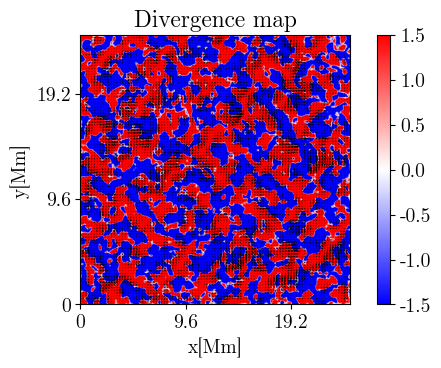

In [146]:
NY = len(Vy_600I_mean)
ymin = np.min(Vy_600I_mean)
ymax = np.max(Vy_600I_mean)
dy = (ymax -ymin )/(NY-1.)

NX = NY
xmin = np.min(Vx_600I_mean)
xmax = np.max(Vx_600I_mean)
dx = (xmax -xmin)/(NX-1.)

rows = 1
cols = 2

plt.figure(figsize=(cols*3.5,rows*3.5))
xmin = 0
xmax = 1536
ymin = 0
ymax=  1536

Fx  = Vx_600I_mean
Fy  = Vy_600I_mean

F = [Fx, Fy]
h = [dx, dy]
g = divergence(F,h)
plt.title("Divergence map")
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")     

Bgtx_disp = Vx_600I_mean[ymin:ymax,xmin:xmax]
Bgty_disp = Vy_600I_mean[ymin:ymax,xmin:xmax]
Bgtz_disp = g[ymin:ymax,xmin:xmax]

ysize,xsize = np.shape(Bgtx_disp)

stride = 16


xmaxind = int(round(xsize/stride))
ymaxind = int(round(ysize/stride))
xstr, ystr = np.meshgrid(stride*np.arange(0,xmaxind),stride*np.arange(0,ymaxind))
im = plt.imshow(Bgtz_disp, origin = 'lower', cmap = "bwr", vmin = -1.5, vmax = 1.5)
plt.xticks([0,600,1200], [0, 9.6, 19.2])
plt.yticks([0,600,1200], [0, 9.6, 19.2])
plt.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride], headwidth = 3, headaxislength = 6, headlength = 4)
plt.colorbar(im)

-0.01120222749935438
4.772511e-07
-0.008199295575330215
2.3734237e-06
CPU times: user 1.1 s, sys: 43.3 ms, total: 1.15 s
Wall time: 1.17 s


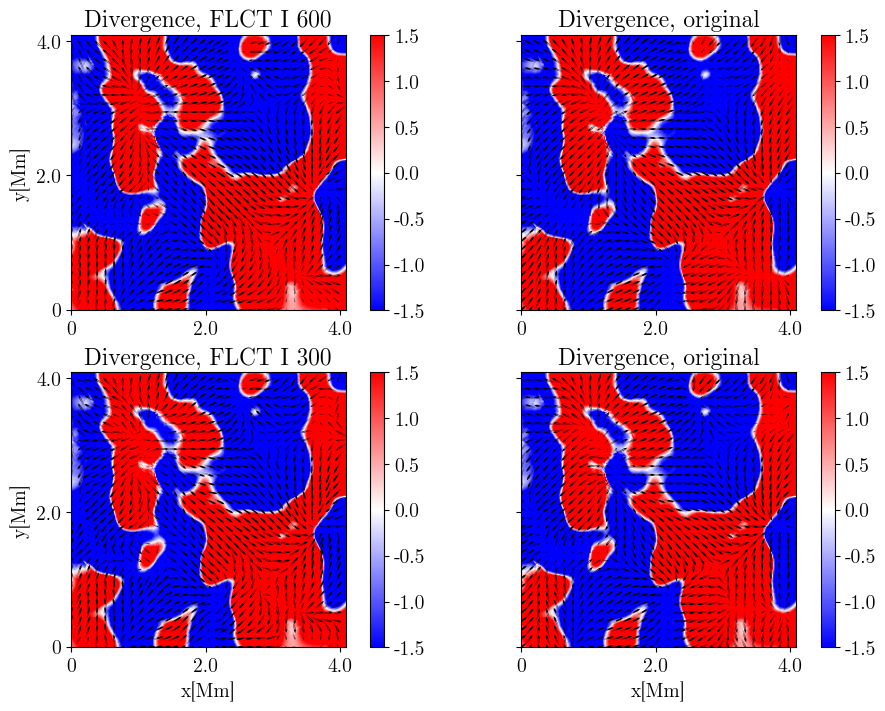

In [147]:
%%time

#600 km I
NY = len(Vy_600I_mean)
ymin = np.min(Vy_600I_mean)
ymax = np.max(Vy_600I_mean)
dy = (ymax -ymin )/(NY-1.)

NX = NY
xmin = np.min(Vx_600I_mean)
xmax = np.max(Vx_600I_mean)
dx = (xmax -xmin)/(NX-1.)

rows = 2
cols = 2

#plt.figure(figsize=(cols*3.5,rows*3.5))
f = plt.figure(constrained_layout=True, figsize=(cols*4.5,rows*3.5))
xmin = 0
xmax = 256
ymin = 0
ymax=  256

Fx  = Vx_600I_mean
Fy  = Vy_600I_mean

F = [Fx, Fy]
h = [dx, dy]
gI600 = divergence(F,h)
print(np.mean(gI600))

Bgtx_disp = Vx_600I_mean[ymin:ymax,xmin:xmax]
Bgty_disp = Vy_600I_mean[ymin:ymax,xmin:xmax]
Bgtz_disp = g[ymin:ymax,xmin:xmax]

ysize,xsize = np.shape(Bgtx_disp)

stride = 8


xmaxind = int(round(xsize/stride))
ymaxind = int(round(ysize/stride))
xstr, ystr = np.meshgrid(stride*np.arange(0,xmaxind),stride*np.arange(0,ymaxind))

ax1 = f.add_subplot(221)
im = ax1.imshow(Bgtz_disp, origin = 'lower', cmap = "bwr", vmin = -1.5, vmax = 1.5)
ax1.set_title("Divergence, FLCT I 600")
#ax1.set_xlabel("x[Mm]")
ax1.set_ylabel("y[Mm]")
ax1.set_xticks([0,125,250], [0, 2.0, 4.000])
ax1.set_yticks([0,125,250], [0, 2.0, 4.000])
ax1.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride], headwidth = 3, headaxislength = 20, headlength = 4)
plt.colorbar(im)
#--------------------------------------------------------
NY = len(Vy_filtered22)
ymin = np.min(Vy_filtered22)
ymax = np.max(Vy_filtered22)
dy = (ymax -ymin )/(NY-1.)

NX = NY
xmin = np.min(Vx_filtered22)
xmax = np.max(Vx_filtered22)
dx = (xmax -xmin)/(NX-1.)


#plt.figure(figsize=(cols*3.5,rows*3.5))
xmin = 0
xmax = 256
ymin = 0
ymax=  256

Fx  = Vx_filtered22
Fy  = Vy_filtered22

F = [Fx, Fy]
h = [dx, dy]
g600 = divergence(F,h)
print(np.mean(g600))

Bgtx_disp = Vx_filtered22[ymin:ymax,xmin:xmax]
Bgty_disp = Vy_filtered22[ymin:ymax,xmin:xmax]
Bgtz_disp = g[ymin:ymax,xmin:xmax]

ysize,xsize = np.shape(Bgtx_disp)

stride = 8


xmaxind = int(round(xsize/stride))
ymaxind = int(round(ysize/stride))
xstr, ystr = np.meshgrid(stride*np.arange(0,xmaxind),stride*np.arange(0,ymaxind))


ax2 = f.add_subplot(222)
imh = ax2.imshow(Bgtz_disp, origin = 'lower', cmap = "bwr", vmin = -1.5, vmax = 1.5)
ax2.set_title("Divergence, original")
#ax2.set_xlabel("x[Mm]")
#ax2.set_ylabel("y[Mm]")
ax2.set_xticks([0,125,250], [0, 2.0, 4.000])
ax2.set_yticks([0,125,250], [0, 2.0, 4.000])
ax2.set_yticklabels([])
ax2.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride], headwidth = 3, headaxislength = 20, headlength = 4)
plt.colorbar(imh)



#300 km Bz
NY = len(Vy_300I_mean)
ymin = np.min(Vy_300I_mean)
ymax = np.max(Vy_300I_mean)
dy = (ymax -ymin )/(NY-1.)

NX = NY
xmin = np.min(Vx_300I_mean)
xmax = np.max(Vx_300I_mean)
dx = (xmax -xmin)/(NX-1.)

xmin = 0
xmax = 256
ymin = 0
ymax=  256

Fx  = Vx_300I_mean
Fy  = Vy_300I_mean

F = [Fx, Fy]
h = [dx, dy]
g300I = divergence(F,h)
print(np.mean(g300I))

Bgtx_disp = Vx_300I_mean[ymin:ymax,xmin:xmax]
Bgty_disp = Vy_300I_mean[ymin:ymax,xmin:xmax]
Bgtz_disp = g[ymin:ymax,xmin:xmax]

ysize,xsize = np.shape(Bgtx_disp)

stride = 8


xmaxind = int(round(xsize/stride))
ymaxind = int(round(ysize/stride))
xstr, ystr = np.meshgrid(stride*np.arange(0,xmaxind),stride*np.arange(0,ymaxind))

ax3 = f.add_subplot(223)
im3 = ax3.imshow(Bgtz_disp, origin = 'lower', cmap = "bwr", vmin = -1.5, vmax = 1.5)
ax3.set_title("Divergence, FLCT I 300")
ax3.set_xlabel("x[Mm]")
ax3.set_ylabel("y[Mm]")
ax3.set_xticks([0,125,250], [0, 2.0, 4.000])
ax3.set_yticks([0,125,250], [0, 2.0, 4.000])
ax3.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride], headwidth = 3, headaxislength = 20, headlength = 4)
plt.colorbar(im3)
#--------------------------------------------------------
NY = len(Vy_filtered11)
ymin = np.min(Vy_filtered11)
ymax = np.max(Vy_filtered11)
dy = (ymax -ymin )/(NY-1.)

NX = NY
xmin = np.min(Vx_filtered11)
xmax = np.max(Vx_filtered11)
dx = (xmax -xmin)/(NX-1.)


#plt.figure(figsize=(cols*3.5,rows*3.5))
xmin = 0
xmax = 256
ymin = 0
ymax=  256

Fx  = Vx_filtered11
Fy  = Vy_filtered11

F = [Fx, Fy]
h = [dx, dy]
g300 = divergence(F,h)
print(np.mean(g300))

Bgtx_disp = Vx_filtered11[ymin:ymax,xmin:xmax]
Bgty_disp = Vy_filtered11[ymin:ymax,xmin:xmax]
Bgtz_disp = g[ymin:ymax,xmin:xmax]

ysize,xsize = np.shape(Bgtx_disp)

stride = 8


xmaxind = int(round(xsize/stride))
ymaxind = int(round(ysize/stride))
xstr, ystr = np.meshgrid(stride*np.arange(0,xmaxind),stride*np.arange(0,ymaxind))


ax4 = f.add_subplot(224)
im4 = ax4.imshow(Bgtz_disp, origin = 'lower', cmap = "bwr", vmin = -1.5, vmax = 1.5)
ax4.set_title("Divergence, original")
ax4.set_xlabel("x[Mm]")
#ax2.set_ylabel("y[Mm]")
ax4.set_xticks([0,125,250], [0, 2.0, 4.000])
ax4.set_yticks([0,125,250], [0, 2.0, 4.000])
ax4.set_yticklabels([])
ax4.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride], headwidth = 3, headaxislength = 20, headlength = 4)
plt.colorbar(im4)

plt.savefig("300_600I_div.png", dpi = 100, bbox_inches = 'tight')

<h2>28. 03. 2025 - Velocity divergence, $B_z$</h2>

-0.002584660459619084
4.772511e-07
-0.0008188669398908212
2.3734237e-06
CPU times: user 1.41 s, sys: 190 ms, total: 1.6 s
Wall time: 1.65 s


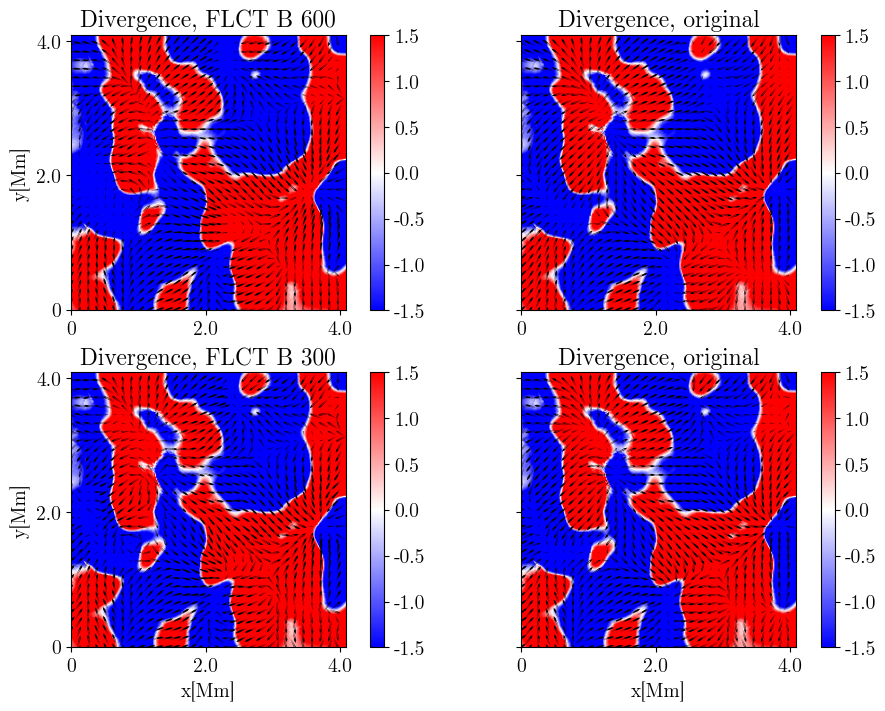

In [148]:
%%time

#600 km Bz
NY = len(Vy_600B_cor)
ymin = np.min(Vy_600B_cor)
ymax = np.max(Vy_600B_cor)
dy = (ymax -ymin )/(NY-1.)

NX = NY
xmin = np.min(Vx_600B_cor)
xmax = np.max(Vx_600B_cor)
dx = (xmax -xmin)/(NX-1.)

rows = 2
cols = 2

#plt.figure(figsize=(cols*3.5,rows*3.5))
f = plt.figure(constrained_layout=True, figsize=(cols*4.5,rows*3.5))
xmin = 0
xmax = 256
ymin = 0
ymax=  256

Fx  = Vx_600B_cor
Fy  = Vy_600B_cor

F = [Fx, Fy]
h = [dx, dy]
g600B = divergence(F,h)
print(np.mean(g600B))

Bgtx_disp = Vx_600B_cor[ymin:ymax,xmin:xmax]
Bgty_disp = Vy_600B_cor[ymin:ymax,xmin:xmax]
Bgtz_disp = g[ymin:ymax,xmin:xmax]

ysize,xsize = np.shape(Bgtx_disp)

stride = 8


xmaxind = int(round(xsize/stride))
ymaxind = int(round(ysize/stride))
xstr, ystr = np.meshgrid(stride*np.arange(0,xmaxind),stride*np.arange(0,ymaxind))

ax1 = f.add_subplot(221)
im = ax1.imshow(Bgtz_disp, origin = 'lower', cmap = "bwr", vmin = -1.5, vmax = 1.5)
ax1.set_title("Divergence, FLCT B 600")
#ax1.set_xlabel("x[Mm]")
ax1.set_ylabel("y[Mm]")
ax1.set_xticks([0,125,250], [0, 2.0, 4.000])
ax1.set_yticks([0,125,250], [0, 2.0, 4.000])
ax1.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride], headwidth = 3, headaxislength = 20, headlength = 4)
plt.colorbar(im)
#--------------------------------------------------------
NY = len(Vy_filtered22)
ymin = np.min(Vy_filtered22)
ymax = np.max(Vy_filtered22)
dy = (ymax -ymin )/(NY-1.)

NX = NY
xmin = np.min(Vx_filtered22)
xmax = np.max(Vx_filtered22)
dx = (xmax -xmin)/(NX-1.)


#plt.figure(figsize=(cols*3.5,rows*3.5))
xmin = 0
xmax = 256
ymin = 0
ymax=  256

Fx  = Vx_filtered22
Fy  = Vy_filtered22

F = [Fx, Fy]
h = [dx, dy]
g600 = divergence(F,h)
print(np.mean(g600))

Bgtx_disp = Vx_filtered22[ymin:ymax,xmin:xmax]
Bgty_disp = Vy_filtered22[ymin:ymax,xmin:xmax]
Bgtz_disp = g[ymin:ymax,xmin:xmax]

ysize,xsize = np.shape(Bgtx_disp)

stride = 8


xmaxind = int(round(xsize/stride))
ymaxind = int(round(ysize/stride))
xstr, ystr = np.meshgrid(stride*np.arange(0,xmaxind),stride*np.arange(0,ymaxind))


ax2 = f.add_subplot(222)
imh = ax2.imshow(Bgtz_disp, origin = 'lower', cmap = "bwr", vmin = -1.5, vmax = 1.5)
ax2.set_title("Divergence, original")
#ax2.set_xlabel("x[Mm]")
#ax2.set_ylabel("y[Mm]")
ax2.set_xticks([0,125,250], [0, 2.0, 4.000])
ax2.set_yticks([0,125,250], [0, 2.0, 4.000])
ax2.set_yticklabels([])
ax2.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride], headwidth = 3, headaxislength = 20, headlength = 4)
plt.colorbar(imh)



#300 km Bz
NY = len(Vy_300B_cor)
ymin = np.min(Vy_300B_cor)
ymax = np.max(Vy_300B_cor)
dy = (ymax -ymin )/(NY-1.)

NX = NY
xmin = np.min(Vx_300B_cor)
xmax = np.max(Vx_300B_cor)
dx = (xmax -xmin)/(NX-1.)

xmin = 0
xmax = 256
ymin = 0
ymax=  256

Fx  = Vx_300B_cor
Fy  = Vy_300B_cor

F = [Fx, Fy]
h = [dx, dy]
g300B = divergence(F,h)
print(np.mean(g300B))

Bgtx_disp = Vx_300B_cor[ymin:ymax,xmin:xmax]
Bgty_disp = Vy_300B_cor[ymin:ymax,xmin:xmax]
Bgtz_disp = g[ymin:ymax,xmin:xmax]

ysize,xsize = np.shape(Bgtx_disp)

stride = 8


xmaxind = int(round(xsize/stride))
ymaxind = int(round(ysize/stride))
xstr, ystr = np.meshgrid(stride*np.arange(0,xmaxind),stride*np.arange(0,ymaxind))

ax3 = f.add_subplot(223)
im3 = ax3.imshow(Bgtz_disp, origin = 'lower', cmap = "bwr", vmin = -1.5, vmax = 1.5)
ax3.set_title("Divergence, FLCT B 300")
ax3.set_xlabel("x[Mm]")
ax3.set_ylabel("y[Mm]")
ax3.set_xticks([0,125,250], [0, 2.0, 4.000])
ax3.set_yticks([0,125,250], [0, 2.0, 4.000])
ax3.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride], headwidth = 3, headaxislength = 20, headlength = 4)
plt.colorbar(im3)
#--------------------------------------------------------
NY = len(Vy_filtered11)
ymin = np.min(Vy_filtered11)
ymax = np.max(Vy_filtered11)
dy = (ymax -ymin )/(NY-1.)

NX = NY
xmin = np.min(Vx_filtered11)
xmax = np.max(Vx_filtered11)
dx = (xmax -xmin)/(NX-1.)


#plt.figure(figsize=(cols*3.5,rows*3.5))
xmin = 0
xmax = 256
ymin = 0
ymax=  256

Fx  = Vx_filtered11
Fy  = Vy_filtered11

F = [Fx, Fy]
h = [dx, dy]
g300 = divergence(F,h)


Bgtx_disp = Vx_filtered11[ymin:ymax,xmin:xmax]
Bgty_disp = Vy_filtered11[ymin:ymax,xmin:xmax]
Bgtz_disp = g[ymin:ymax,xmin:xmax]

ysize,xsize = np.shape(Bgtx_disp)

stride = 8


xmaxind = int(round(xsize/stride))
ymaxind = int(round(ysize/stride))
xstr, ystr = np.meshgrid(stride*np.arange(0,xmaxind),stride*np.arange(0,ymaxind))


ax4 = f.add_subplot(224)
im4 = ax4.imshow(Bgtz_disp, origin = 'lower', cmap = "bwr", vmin = -1.5, vmax = 1.5)
ax4.set_title("Divergence, original")
ax4.set_xlabel("x[Mm]")
#ax2.set_ylabel("y[Mm]")
ax4.set_xticks([0,125,250], [0, 2.0, 4.000])
ax4.set_yticks([0,125,250], [0, 2.0, 4.000])
ax4.set_yticklabels([])
ax4.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride], headwidth = 3, headaxislength = 20, headlength = 4)
plt.colorbar(im4)






print(np.mean(g300))
plt.savefig("300_600B_div.png", dpi = 100, bbox_inches = 'tight')

In [149]:
divI600 = pearsonr(g600.flatten(), gI600.flatten())
print(divI600)

PearsonRResult(statistic=np.float64(0.8221750402557876), pvalue=np.float64(0.0))


In [150]:
divI300 = pearsonr(g300.flatten(), g300I.flatten())
print(divI300)

PearsonRResult(statistic=np.float64(0.6011678305106638), pvalue=np.float64(0.0))


In [151]:
divB600 = pearsonr(g600.flatten(), g600B.flatten())
print(divB600)

PearsonRResult(statistic=np.float64(0.724281582430369), pvalue=np.float64(0.0))


In [152]:
divB300 = pearsonr(g300.flatten(), g300B.flatten())
print(divB300)

PearsonRResult(statistic=np.float64(0.6326806983088177), pvalue=np.float64(0.0))
